In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from matplotlib import rc

# Enable LaTeX rendering
rc('text', usetex=True)

In [2]:
colormap = mpl.colormaps["tab20"]
# colormap get the first color
color = colormap(0)
color
# Function to format scientific notation in LaTeX-like style
def format_sci(value):
    base, exponent = f"{value:.1e}".split("e")
    return f"${base} \\times 10^{{{int(exponent)}}}$"

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


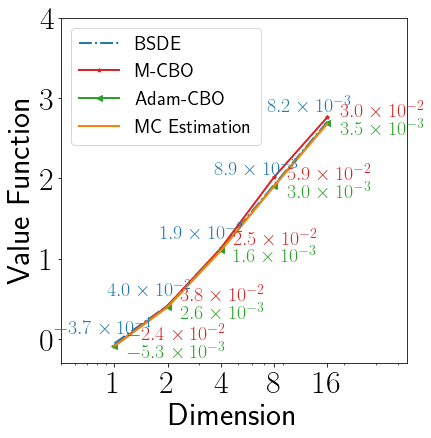

In [3]:

dim = [1, 2, 4, 8, 16]
cbo_value_silu = []
cbo_value_silu_mcbo = []

han_2018_value = []
y_start = []

# Read the data
for d in dim:
    data = pd.read_csv(f"../LQ/BSDE/case_case1_hjb_dim_{d:03d}.csv")
    y_start.append(data["yExact"].values[-1])
    han_2018_value.append(data["yMean"].values[-1])

for d in dim:
    data = np.load(f"../LQ/Adam_CBO_case1/result_{d}/result.npz")
    cbo_value_silu.append(data["cbo_value"][0])

for d in dim:
    data = np.load(f"../LQ/M_CBO_case1/result_{d}/result.npz")
    cbo_value_silu_mcbo.append(data["cbo_value"][0])


# Plotting
plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)
plt.semilogx(dim, han_2018_value, "-.", label="BSDE", color=colormap(0), linewidth=2)
plt.semilogx(dim, cbo_value_silu_mcbo, "-*", label="M-CBO", color=colormap(6), linewidth=2,markersize=4)
plt.semilogx(dim, cbo_value_silu, "-<", label="Adam-CBO", color=colormap(4), linewidth=2)
plt.semilogx(dim, y_start, label="MC Estimation", color=colormap(2), linewidth=2)

# Adding text with formatted values
for i, d in enumerate(dim):
    han_diff = abs(han_2018_value[i] - y_start[i]) / y_start[i]
    cbo_diff = abs(cbo_value_silu[i] - y_start[i]) / y_start[i]
    mcbo_diff = abs(cbo_value_silu_mcbo[i] - y_start[i]) / y_start[i]
    plt.text(d / 2.2, han_2018_value[i] + 0.15, format_sci(han_diff), fontsize=20, color=colormap(0))
    plt.text(d / 0.85, cbo_value_silu[i] - 0.12, format_sci(cbo_diff), fontsize=20, color=colormap(4))
    plt.text(d / 0.85, cbo_value_silu[i] + 0.1, format_sci(mcbo_diff), fontsize=20, color=colormap(6))

# Labels and ticks
plt.xlabel("Dimension", fontsize=32)
plt.ylabel("Value Function", fontsize=32)
plt.xticks(dim, labels=[r"${}$".format(d)  for d in dim], fontsize=32)
plt.yticks(np.arange(0,5,1),fontsize=32)
plt.legend(fontsize=20)
plt.xlim([0.5, 45])
plt.ylim([-0.3, 4])

# Save figures
plt.savefig("value_function_case1.eps")
plt.savefig("value_function_case1.pdf")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


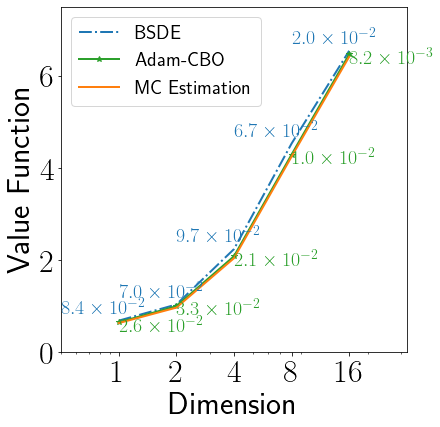

In [6]:

dim = [1, 2, 4, 8, 16]
cbo_value_silu = []
han_2018_value = []
y_start = []

# Read the data
for d in dim:
    data = pd.read_csv(f"../LQ/BSDE/case_case2_hjb_dim_{d:03d}.csv")
    y_start.append(data["yExact"].values[-1])
    han_2018_value.append(data["yMean"].values[-1])

for d in dim:
    data = np.load(f"../LQ/Adam_CBO_case2/result_{d}/result.npz")
    cbo_value_silu.append(data["cbo_value"][0])



# Plotting
plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)
plt.semilogx(dim, han_2018_value, "-.", label="BSDE", color=colormap(0), linewidth=2)
plt.semilogx(dim, cbo_value_silu, "-*", label="Adam-CBO", color=colormap(4), linewidth=2)
plt.semilogx(dim, y_start, label="MC Estimation", color=colormap(2), linewidth=2)

# Adding text with formatted values
for i, d in enumerate(dim):
    han_diff = abs(han_2018_value[i] - y_start[i]) / y_start[i]
    cbo_diff = abs(cbo_value_silu[i] - y_start[i]) / y_start[i]
    
    plt.text(d /2, han_2018_value[i] + 0.2, format_sci(han_diff), fontsize=20, color=colormap(0))
    plt.text(d , cbo_value_silu[i] - 0.15, format_sci(cbo_diff), fontsize=20, color=colormap(4))

# Labels and ticks
plt.xlabel("Dimension", fontsize=32)
plt.ylabel("Value Function", fontsize=32)
plt.xticks(dim, labels=[r"${}$".format(d)  for d in dim], fontsize=32)
plt.yticks(np.arange(0,8,2),fontsize=32)
plt.legend(fontsize=20)
plt.xlim([0.5, 32])
plt.ylim([0, 7.5])

# Save figures
plt.savefig("value_function_case2.eps")
plt.savefig("value_function_case2.pdf")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


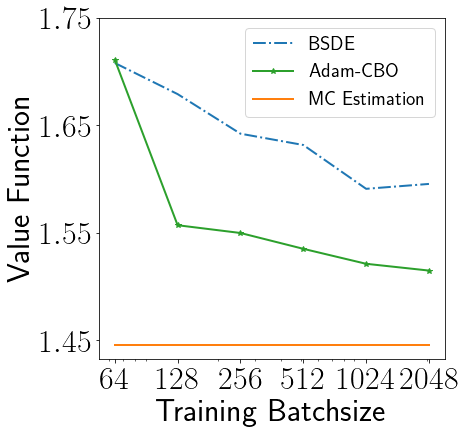

In [9]:

dim = [64,128,256,512,1024,2048]
cbo_value_silu = []
han_2018_value = []
y_start = []

# Read the data
for d in dim:
    data = pd.read_csv(f"../LQ/BSDE_case5_batch_size/case_case5_hjb_dim_{d:03d}.csv")
    y_start.append(data["yExact"].values[-1])
    han_2018_value.append(data["yMean"].values[-1])

for d in dim:
    data = np.load(f"../LQ/Adam_CBO_case5/result_{d}/result.npz")
    cbo_value_silu.append(data["cbo_value"][0])



# Plotting
plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.16)
plt.semilogx(dim, han_2018_value, "-.", label="BSDE", color=colormap(0), linewidth=2)
plt.semilogx(dim, cbo_value_silu, "-*", label="Adam-CBO", color=colormap(4), linewidth=2)
plt.semilogx(dim, y_start, label="MC Estimation", color=colormap(2), linewidth=2)

# Adding text with formatted values
for i, d in enumerate(dim):
    han_diff = (han_2018_value[i] - y_start[i]) / y_start[i]
    cbo_diff = (cbo_value_silu[i] - y_start[i]) / y_start[i]
    
    # plt.text(d /2, han_2018_value[i] + 0.2, format_sci(han_diff), fontsize=18, color=colormap(0))
    # plt.text(d , cbo_value_silu[i] - 0.15, format_sci(cbo_diff), fontsize=18, color=colormap(4))
    

# Labels and ticks
plt.xlabel("Training Batchsize", fontsize=32)
plt.ylabel("Value Function", fontsize=32)
plt.xticks(dim, labels=[r"${}$".format(d)  for d in dim], fontsize=32)
plt.yticks(np.arange(1.45,1.80,0.1),fontsize=32)
plt.legend(fontsize=20)
plt.savefig("batch_size_value.eps")
plt.savefig("batch_size_value.pdf")

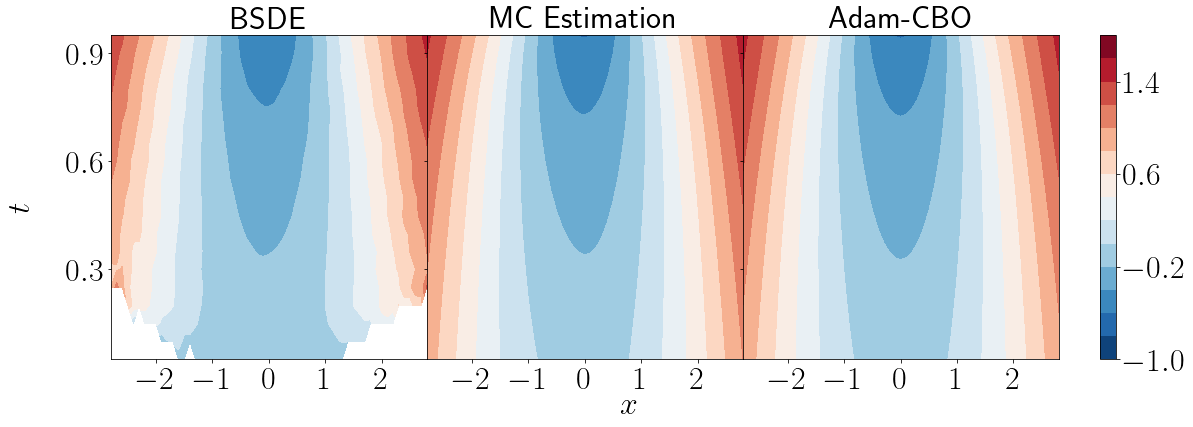

In [10]:

# Load your data
data_han = np.load("../LQ/value_function_case1/data_hjb_1D_plot.npz")
data_est = np.load("../LQ/value_function_case1/data_hjb_1D_plot_est.npz")
data_cbo = np.load("../LQ/value_function_case1/cbo_hjb_1D.npz")

# Create subplots, sharing the y-axis, with no horizontal space between them
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Adjust the layout to remove space between the subplots
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15, wspace=0)

# Plot the first contour
contour1 = axs[0].contourf(data_han["X"], data_han["t"], data_han["res"],levels=np.arange(-1,2,0.2),cmap='RdBu_r')
axs[0].set_title('BSDE', fontsize=32)
axs[0].set_xticks(np.arange(-2, 3, 1))
axs[0].set_xlim([-2.8,2.8])
axs[0].set_yticks(np.arange(0, 1.1, 0.3))
axs[0].tick_params(axis='both', which='major', labelsize=32)

# Plot the second contour
contour2 = axs[1].contourf(data_han["X"], data_han["t"], data_est["res"],levels=np.arange(-1,2,0.2),cmap='RdBu_r')
axs[1].set_title('MC Estimation', fontsize=32)
axs[1].set_xticks(np.arange(-2, 3, 1))
axs[1].set_xlim([-2.8,2.8])

axs[1].tick_params(axis='x', which='major', labelsize=32)

# Plot the third contour
contour3 = axs[2].contourf(data_han["X"], data_han["t"], data_cbo["cbo_value"][..., 0],levels=np.arange(-1,2,0.2),cmap='RdBu_r')
axs[2].set_title('Adam-CBO', fontsize=32)
axs[2].set_xticks(np.arange(-2, 3, 1))
axs[2].set_xlim([-2.8,2.8])
axs[2].tick_params(axis='x', which='major', labelsize=32)

# Add a single color bar that spans all three plots
cbar = fig.colorbar(contour3, ax=axs, location='right', fraction=0.046, pad=0.04,ticks=np.arange(-1,3,0.8))
cbar.ax.tick_params(labelsize=32)

# Set the y-axis label on the first subplot
fig.supylabel(r'$t$', fontsize=32)
fig.supxlabel(r'$x$', fontsize=32)

plt.savefig("value_function_1D_case1.eps")
plt.savefig("value_function_1D_case1.pdf")

In [ ]:

# Load your data
data_han = np.load("../LQ/value_function_case2/data_hjb_1D_plot.npz")
data_est = np.load("../LQ/value_function_case2/data_hjb_1D_plot_est.npz")
data_cbo = np.load("../LQ/value_function_case2/cbo_hjb_1D.npz")

# Create subplots, sharing the y-axis, with no horizontal space between them
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Adjust the layout to remove space between the subplots
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15, wspace=0)

# Plot the first contour
contour1 = axs[0].contourf(data_han["X"], data_han["t"], data_han["res"],levels=np.arange(0,4,0.25),cmap='RdBu_r')
axs[0].set_title('BSDE', fontsize=32)
axs[0].set_xticks(np.arange(-2, 3, 1))
axs[0].set_xlim([-2.8,2.8])
axs[0].set_yticks(np.arange(0, 1.1, 0.3))
axs[0].tick_params(axis='both', which='major', labelsize=32)

# Plot the second contour
contour2 = axs[1].contourf(data_han["X"], data_han["t"], data_est["res"],levels=np.arange(0,4,0.25),cmap='RdBu_r')
axs[1].set_title('MC Estimation', fontsize=32)
axs[1].set_xticks(np.arange(-2, 3, 1))
axs[1].set_xlim([-2.8,2.8])

axs[1].tick_params(axis='x', which='major', labelsize=32)

# Plot the third contour
contour3 = axs[2].contourf(data_han["X"], data_han["t"], data_cbo["cbo_value"][..., 0],levels=np.arange(0,4,0.25),cmap='RdBu_r')
axs[2].set_title('Adam-CBO', fontsize=32)
axs[2].set_xticks(np.arange(-2, 3, 1))
axs[2].set_xlim([-2.8,2.8])
axs[2].tick_params(axis='x', which='major', labelsize=32)

# Add a single color bar that spans all three plots
cbar = fig.colorbar(contour3, ax=axs, location='right', fraction=0.046, pad=0.04,ticks=np.arange(0.0,5,1))
cbar.ax.tick_params(labelsize=32)

# Set the y-axis label on the first subplot
fig.supylabel(r'$t$', fontsize=32)
fig.supxlabel(r'$x$', fontsize=32)

plt.savefig("value_function_1D_case2.eps")
plt.savefig("value_function_1D_case2.pdf")
plt.savefig("value_function_1D_case2.png")


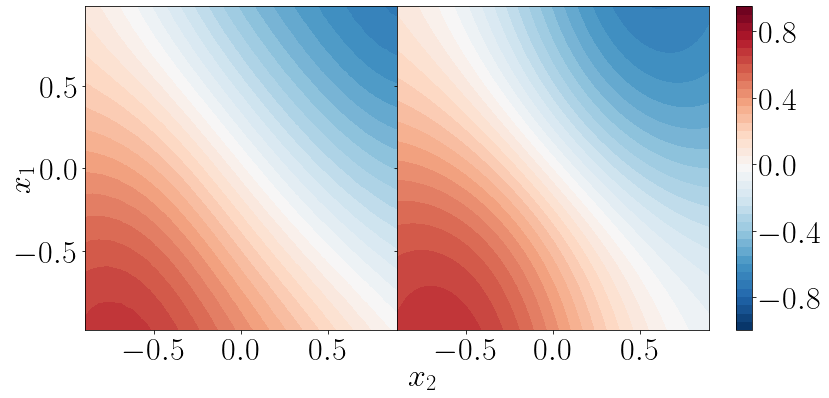

In [12]:
import scipy.stats as stats

# Create subplots, sharing the y-axis, with no horizontal space between them
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Adjust the layout to remove space between the subplots
fig.subplots_adjust(left=0.11, right=0.9, top=0.9, bottom=0.15, wspace=0)
data = np.load("../Ginzburg_landau/GL_1D/result_2/action.npz")
axs[0].contourf(data["X"][1:-1,1:-1],data["Y"][1:-1,1:-1],data["action"][1:-1,1:-1,0,0],levels=np.arange(-1,1,0.05),cmap='RdBu_r')
# axs[0].set_title('Our method', fontsize=20)
axs[0].set_xticks(np.arange(-1, 1, 0.5))
axs[0].set_xlim([-0.9,0.9])
axs[0].set_yticks(np.arange(-1, 1, 0.5))
axs[0].tick_params(axis='both', which='major', labelsize=32)



contour1 = axs[1].contourf(data["X"][1:-1,1:-1],data["Y"][1:-1,1:-1],data["a_pred"],levels=np.arange(-1,1,0.05),cmap='RdBu_r')
axs[1].set_xticks(np.arange(-1, 1, 0.5))
axs[1].set_xlim([-0.9,0.9])
axs[1].tick_params(axis='x', which='major', labelsize=32)
cbar = fig.colorbar(contour1, ax=axs, location='right', fraction=0.046, pad=0.04,ticks=np.arange(-0.8,1.1,0.4))
cbar.ax.tick_params(labelsize=32)

# Set the y-axis label on the first subplot
fig.supylabel(r'$x_1$', fontsize=32)
fig.supxlabel(r'$x_2$', fontsize=32)
plt.savefig("control_1D_GL_2d.eps")
plt.savefig("control_1D_GL_2d.pdf")
# Add a shared x-axis label
# fig.supxlabel('x', fontsize=20)

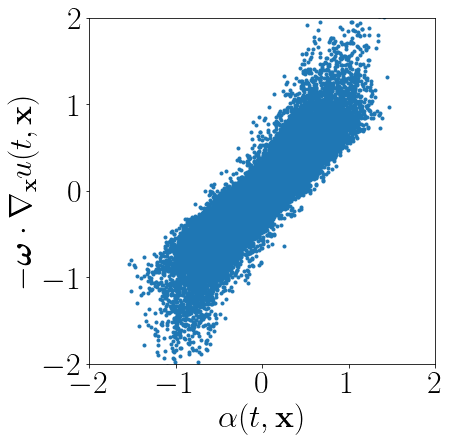

In [13]:
import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{bm}'
plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)
data = np.load("../Ginzburg_landau/GL_1D_multi/result_16/action_data.npz")
action = data["action"].flatten()
a_pred = data["a_pred"].flatten()

plt.plot(action, a_pred,".", color=colormap(0))

plt.xlabel(r"$\alpha(t,\mathbf{x})$", fontsize=32)
plt.ylabel(r"$-\boldsymbol{\omega}\cdot \nabla_{\mathbf{x}} u(t,\mathbf{x})$", fontsize=32)
# 
# plt.ylabel(r"$-\boldsymbol{\omega} \nabla_{\mathbf{x}} v(t,\mathbf{x})$", fontsize=20)
plt.xticks(np.arange(-2,4,1),fontsize=32)
plt.yticks(np.arange(-2,4,1),fontsize=32)
# plt.legend(fontsize=16)
plt.xlim([-2,2])
plt.ylim([-2, 2])
plt.savefig("consistence_16D.eps")
plt.savefig("consistence_16D.pdf")

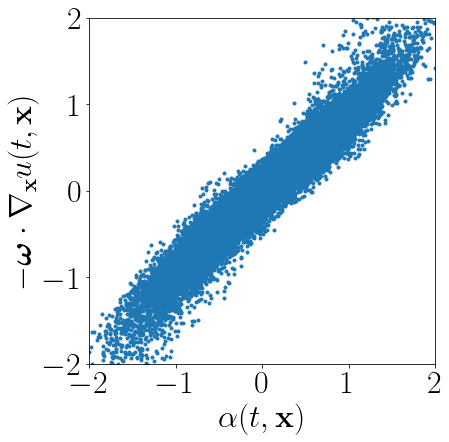

In [14]:
import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{bm}'
plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)
data = np.load("../Ginzburg_landau/GL_1D_multi/result_8/action_data.npz")
action = data["action"].flatten()
a_pred = data["a_pred"].flatten()

plt.plot(action, a_pred,".", color=colormap(0))

plt.xlabel(r"$\alpha(t,\mathbf{x})$", fontsize=32)
plt.ylabel(r"$-\boldsymbol{\omega}\cdot \nabla_{\mathbf{x}} u(t,\mathbf{x})$", fontsize=32)
# 
# plt.ylabel(r"$-\boldsymbol{\omega} \nabla_{\mathbf{x}} v(t,\mathbf{x})$", fontsize=20)
plt.xticks(np.arange(-2,4,1),fontsize=32)
plt.yticks(np.arange(-2,4,1),fontsize=32)
# plt.legend(fontsize=16)
plt.xlim([-2,2])
plt.ylim([-2, 2])
plt.savefig("consistence_8D.eps")
plt.savefig("consistence_8D.pdf")

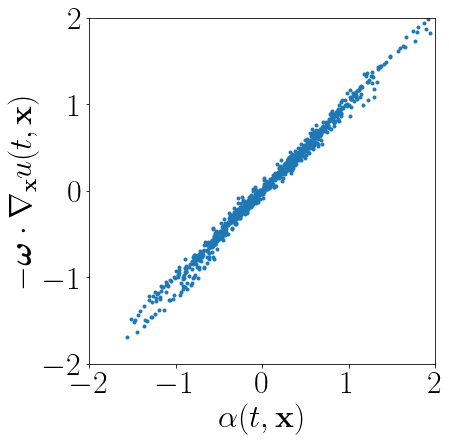

In [15]:
import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{bm}'
plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)
data = np.load("../Ginzburg_landau/GL_1D_multi/result_4/action_data.npz")
action = data["action"].flatten()
a_pred = data["a_pred"].flatten()

plt.plot(action, a_pred,".", color=colormap(0))

plt.xlabel(r"$\alpha(t,\mathbf{x})$", fontsize=32)
plt.ylabel(r"$-\boldsymbol{\omega}\cdot \nabla_{\mathbf{x}} u(t,\mathbf{x})$", fontsize=32)
# 
# plt.ylabel(r"$-\boldsymbol{\omega} \nabla_{\mathbf{x}} v(t,\mathbf{x})$", fontsize=20)
plt.xticks(np.arange(-2,4,1),fontsize=32)
plt.yticks(np.arange(-2,4,1),fontsize=32)
# plt.legend(fontsize=16)
plt.xlim([-2,2])
plt.ylim([-2, 2])
plt.savefig("consistence_4D.eps")
plt.savefig("consistence_4D.pdf")

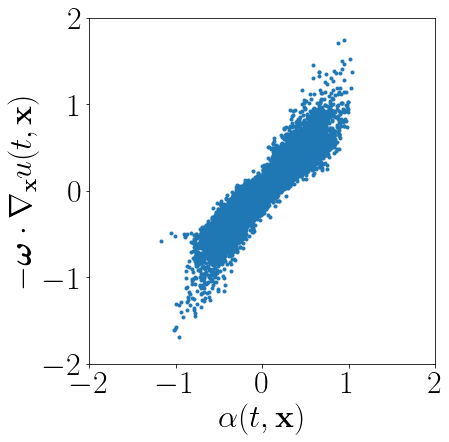

In [16]:
import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{bm}'
plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)
data = np.load("../Ginzburg_landau/GL_1D_multi/result_32/action_data.npz")
action = data["action"].flatten()
a_pred = data["a_pred"].flatten()

plt.plot(action, a_pred,".", color=colormap(0))

plt.xlabel(r"$\alpha(t,\mathbf{x})$", fontsize=32)
plt.ylabel(r"$-\boldsymbol{\omega}\cdot \nabla_{\mathbf{x}} u(t,\mathbf{x})$", fontsize=32)
# 
# plt.ylabel(r"$-\boldsymbol{\omega} \nabla_{\mathbf{x}} v(t,\mathbf{x})$", fontsize=20)
plt.xticks(np.arange(-2,4,1),fontsize=32)
plt.yticks(np.arange(-2,4,1),fontsize=32)
# plt.legend(fontsize=16)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.savefig("consistence_32D.eps")
plt.savefig("consistence_32D.pdf")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


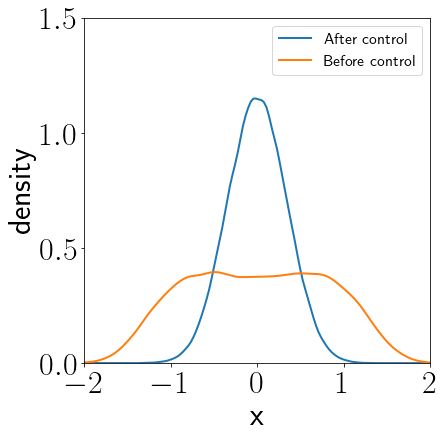

In [25]:
import scipy.stats as stats

plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)
data = np.load("../Ginzburg_landau/GL_1D/simulation_data.npz")
x_control = data["x_control"][...,0].flatten()
x_free = data["x_free"][...,0].flatten()

x = np.linspace(-3, 3, 200)
kernel = stats.gaussian_kde(x_control)
plt.plot(x, kernel(x), label="After control", color=colormap(0), linewidth=2)
kernel = stats.gaussian_kde(x_free)
plt.plot(x, kernel(x), label="Before control", color=colormap(2), linewidth=2)

plt.xlabel("x", fontsize=32)
plt.ylabel("density", fontsize=32)
plt.xticks(np.arange(-2,4,1),fontsize=32)
plt.yticks(np.arange(0,4,0.5),fontsize=32)
plt.legend(fontsize=16)
plt.xlim([-2,2])
plt.ylim([0, 1.5])
plt.savefig("density_x1.eps")
plt.savefig("density_x1.pdf")